**Question 1: What is Boosting in Machine Learning? Explain how it improves weak
learners.**

> Boosting is an ensemble modeling technique designed to create a strong classifier by combining multiple weak classifiers. The process involves building models sequentially, where each new model aims to correct the errors made by the previous ones.

**Implementation Steps of Bagging:**
* Initially, a model is built using the training data.
* Subsequent models are then trained to address the mistakes of their predecessors.
* boosting assigns weights to the data points in the original dataset.
* Higher weights: Instances that were misclassified by the previous model receive higher weights.
* Lower weights: Instances that were correctly classified receive lower weights.
* Training on weighted data: The subsequent model learns from the weighted dataset, focusing its attention on harder-to-learn examples (those with higher weights).
* This iterative process continues until:
    * The entire training dataset is accurately predicted, or
    * A predefined maximum number of models is reached.


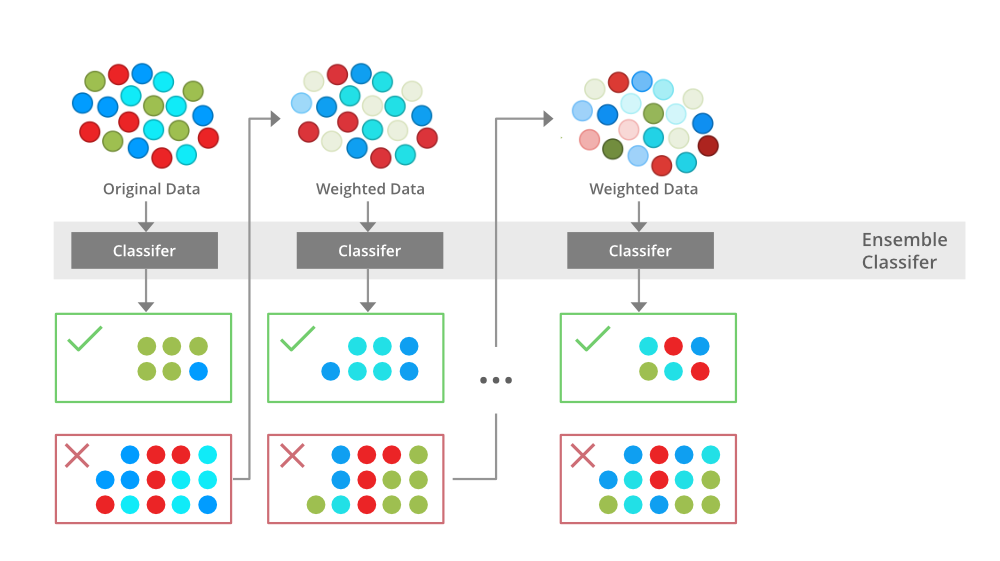

**Question 2: What is the difference between AdaBoost and Gradient Boosting in terms of how models are trained?**

* AdaBoost: AdaBoost adjusts the importance of data points. If a data point was misclassified by a weak learner, it receives a higher weight, making it more likely to be selected and correctly classified by the next weak learner.  New models are trained on the same data but with a modified sample distribution due to the updated weights.

* Gradient Boosting: Gradient Boosting fits new models to the negative gradients of the loss function, effectively predicting the error (residuals) of the previous model. Each new model is trained to correct the errors made by the ensemble so far. New models are built to fit these residuals, making them an additive model that gradually minimizes the overall loss function through a process similar to gradient descent.


**Question 3: How does regularization help in XGBoost?**

> Regularization in XGBoost helps prevent overfitting by adding a penalty term to the objective function, which discourages overly complex models and promotes generalization to unseen data.
>
>It achieves this by controlling the complexity of the trees through hyperparameters like reg_alpha (L1 regularization) to promote sparsity in leaf weights and reg_lambda (L2 regularization) to shrink leaf weights towards zero. This results in a simpler, more robust model that performs better on new data.  


**Question 4: Why is CatBoost considered efficient for handling categorical data?**

> CatBoost is considered highly efficient for handling categorical data primarily because it incorporates a novel, native approach to processing categorical features that avoids the extensive and often problematic preprocessing (like manual one-hot or label encoding) required by other gradient boosting algorithms such as XGBoost and LightGBM.
>
>This efficiency stems from two main technical innovations: Ordered Target Encoding and a specialized Ordered Boosting scheme.

**Question 5: What are some real-world applications where boosting techniques are preferred over bagging methods?**

> Boosting techniques are preferred over bagging methods for applications requiring higher accuracy, particularly when data complexity demands high precision, such as:
* Medical diagnosis for predicting disease risk
* Financial forecasting for pricing analysis
* Search engine ranking for page relevance.

In [1]:
"""
Use sklearn.datasets.load_breast_cancer() for classification tasks.
Use sklearn.datasets.fetch_california_housing() for regression
tasks.
"""

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the dataset
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a classification model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Breast Cancer Classification Accuracy: {accuracy:.2f}")



Breast Cancer Classification Accuracy: 0.96


In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dataset
california_housing = fetch_california_housing(as_frame=True)
X = california_housing.data
y = california_housing.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"California Housing Regression Mean Squared Error: {mse:.2f}")

California Housing Regression Mean Squared Error: 0.56



**Question 6: Write a Python program to:**
* Train an AdaBoost Classifier on the Breast Cancer dataset
* Print the model accuracy


In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )


adaboost_clf = AdaBoostClassifier(n_estimators=100, random_state=42)

adaboost_clf.fit(X_train, y_train)
print("Training complete.\n")

y_pred = adaboost_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"AdaBoost Classifier Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))



Training complete.

AdaBoost Classifier Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

   malignant       0.97      0.91      0.94        64
      benign       0.95      0.98      0.96       107

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



**Question 7: Write a Python program to:**
* Train a Gradient Boosting Regressor on the California Housing dataset
* Evaluate performance using R-squared score

In [7]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

housing = fetch_california_housing(as_frame=True)
X = housing.data
y = housing.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train, y_train)

y_pred = gbr.predict(X_test)

r_squared = r2_score(y_test, y_pred)

print(f"R-squared score on the test set: {r_squared:.2f}")

R-squared score on the test set: 0.78


**Question 8: Write a Python program to:**
* Train an XGBoost Classifier on the Breast Cancer dataset
* Tune the learning rate using GridSearchCV
* Print the best parameters and accuracy

In [8]:
import xgboost as xgb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False, random_state=42)

param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")

best_xgb_model = grid_search.best_estimator_

y_pred = best_xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set with best parameters: {accuracy:.2f}")

Best parameters: {'learning_rate': 0.2}
Accuracy on the test set with best parameters: 0.96


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:14:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


**Question 9: Write a Python program to: **
* Train a CatBoost Classifier
* Plot the confusion matrix using seaborn

In [10]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.5 MB/s eta 0:00:00


Accuracy of CatBoost Classifier: 0.99


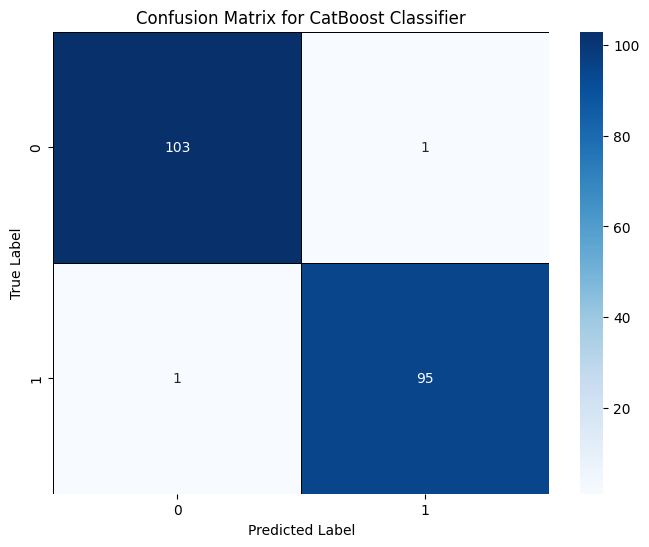

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from catboost import CatBoostClassifier
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=10, n_informative=5,
                           n_redundant=0, n_clusters_per_class=1, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = CatBoostClassifier(iterations=100,
                           learning_rate=0.1,
                           depth=6,
                           loss_function='Logloss',
                           random_seed=42,
                           verbose=False)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of CatBoost Classifier: {accuracy:.2f}")

cm = confusion_matrix(y_test, y_pred)

class_labels = np.unique(y)
cm_df = pd.DataFrame(cm, index=class_labels, columns=class_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=True,
            linewidths=.5, linecolor='black')
plt.title('Confusion Matrix for CatBoost Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**Question 10: You're working for a FinTech company trying to predict loan default using customer demographics and transaction behavior.
The dataset is imbalanced, contains missing values, and has both numeric and
categorical features.
Describe your step-by-step data science pipeline using boosting techniques:**
* Data preprocessing & handling missing/categorical values
* Choice between AdaBoost, XGBoost, or CatBoost
* Hyperparameter tuning strategy
* Evaluation metrics you'd choose and why
* How the business would benefit from your model

> **1. Data Preprocessing**- Handling Missing Values
>
> * Numeric features: Use median imputation (robust to outliers) or boosting algorithm (like XGBoost/CatBoost) to handle missing values natively.
>
> * Categorical features: For models that require numeric input (e.g., XGBoost), apply one-hot encoding or target encoding (depending on cardinality).
>
>CatBoost can handle missing and categorical features automatically using internal encoding and “missing value” indicators.
>
> **Feature Scaling** - Boosting models are tree-based, so scaling is not required.
(Unlike linear or distance-based models.)
>
>**Handling Imbalance**
>
>* Dataset is imbalanced (defaults ≪ non-defaults). Use one or more of:
>* SMOTE or ADASYN (synthetic minority oversampling).
>* Class weighting (scale_pos_weight in XGBoost or class_weights in CatBoost).
>* Stratified sampling during train-test split to preserve class distribution.

> **2. Model Choice: AdaBoost vs. XGBoost vs. CatBoost**- Handles categorical & missing data natively, less feature engineering, avoids target leakage via ordered encoding so we use catboost.

> **3. Hyperparameter Tuning**- For CatBoost (or XGBoost):
> * learning_rate — controls step size (start small: 0.01–0.1)
> * depth — tree depth (controls complexity, try 4–10)
> * iterations — number of trees (e.g., 500–2000)
> * l2_leaf_reg — regularization strength
> * scale_pos_weight — for class imbalance
> * subsample, colsample_bylevel — to prevent overfitting

> **4. Evaluation Metrics**- Since the dataset is imbalanced, accuracy is misleading. Use metrics focusing on the positive (default) class:
> * Primary metric:
> * ROC-AUC - balances sensitivity and specificity.
> * Secondary metrics:
>     * Precision, Recall, and F1-score (for default class) measure real-world business trade-offs.
>     * PR-AUC – more informative when defaults are rare.
>     * Business metric: Expected Loss or Cost-sensitive metric (e.g., monetary loss if a default is missed).

> **5. Business Impact**-
> * Reduced financial risk:
> * Optimized approval rates
> * Better customer experience:
> * Regulatory compliance:
